# Lecture 3
Monitoring solution process is important. While looking at numbers stored in a text file is fun, it is much easier to comprehend data using graphs and plots.

We will:
* Look at reading numerical data from files (stored as columns of numbers, but other formats can also be read)
* Use the MatPlotLib library to produce some simple line, bar and color plots.

* Have a look at SciPy to illustrate capabilities, find some function extrema and roots, perform some interpolation (and extrapolation).

## Matplotlib
is a very popular plotting library for python. It can be used to produce almost publication quality figures. Personally I use it for most of my plotting needs, but for publications I prefer Latex Tix library.

Let us start with our first plot of some `f(x)` function. We will be using `nympy.array` to handle our data. To use `matplotlib` we need to import it:

### First plot

In [1]:
import matplotlib.pyplot as plt

To have a plot for $x \in [-1, 1]$ we will use `numpy.linspace()` we skipped last time:

In [8]:
import numpy as np

x = np.linspace(-1, 1, 101)
# Generate 101 points between -1 and 1 including boundaries
y = x**2

And plotting `y(x)` is just:

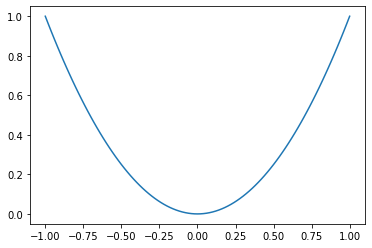

In [9]:
plt.plot(x, y)

We can do many things with the plot. Add grid, set axis limits, add text, labels, change sizes, colors, etc.

For now let just increase the size of the plot, add a legend entry  a grid, change the font size and thickness of the line.

We can also do a scatter plot:

(-0.05, 1.05)

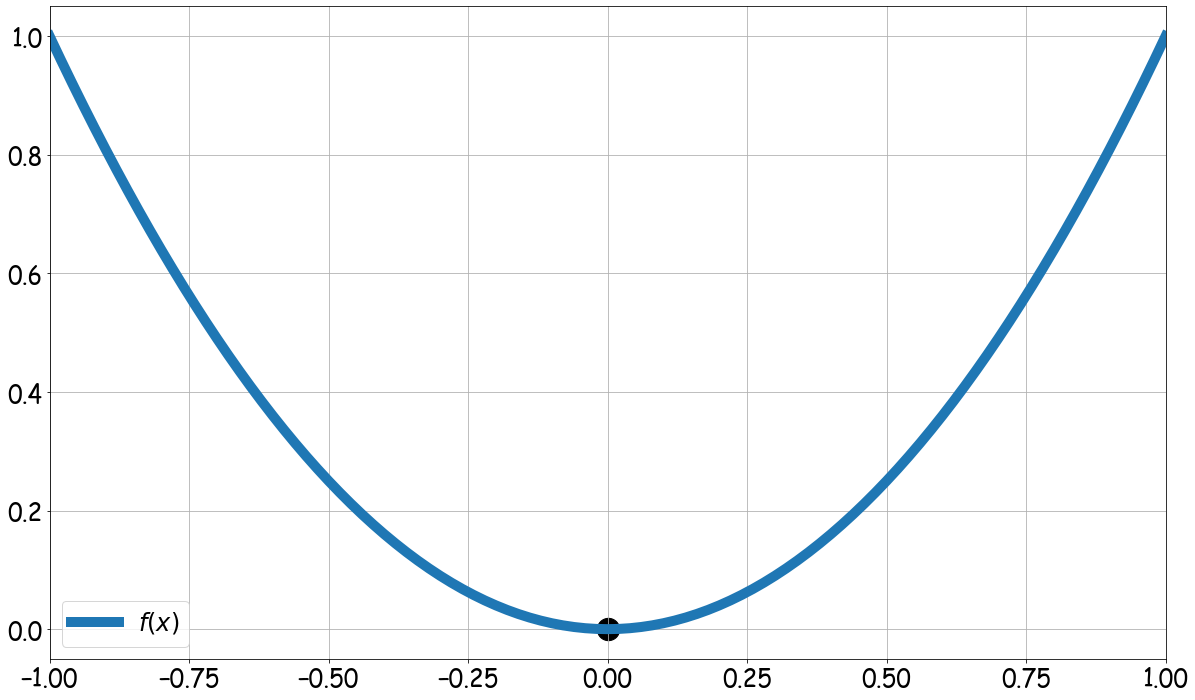

In [70]:
f = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(x, y, label='$f(x)$', lw=10)
plt.scatter(0,0, s=500, c='black')

plt.grid()
plt.legend()
plt.xlim(x[0], x[-1])
plt.ylim(min(y)-0.05, max(y)+0.05)

So we can make a plot:
* Add log scaling
* Show plotting with subplots
* TBA

## Reading from files (with data)
We consider a computational process monitoring of which is performed with a text data stored to a file during the calculation. Here I have a file `mean.avg` that contains average values of some vector field in time:

In [33]:
ls

'Lecture 3.ipynb'   mean.avg


Let's start by examining the content of the file (in notepad).

The file contains columns of numbers (possibly comma separated, or not) so the best way to treat is is to precess it directly to NymPy arrays using NumPy functions. Note: Processing of ``noraml`` text files can also be performed, but in case of data files using NumPy functions is more natural.

In [38]:
T, c1, c2, c3 = np.loadtxt('mean.avg', comments="#", skiprows=1, usecols=(0,1,2,3), unpack=True)

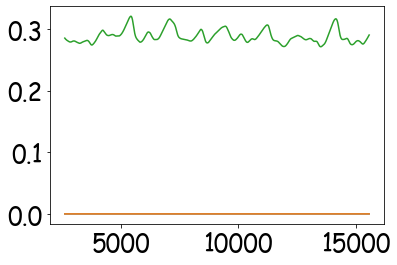

In [39]:
plt.plot(T, c1, T, c2, T, c3)

## SciPy
Is the second probably most commonly (my opinion rather than fact) used library when it comes to processing data. You could say, that when it comes to numerical procedures - SciPy has it all. We will focus on only some of the available algorithms, but should you need more - you know where to look.

We will:
* Decimate data
* Use interpolation 
* Look for extrema
* Look for roots
* integrate
* differentiate
* solve an ODE

We will use a slice of data from mean.avg:

In [63]:
X =  T[10000:13000:250] # We can select every other value from an array!
Y = c3[10000:13000:250]
print(len(X), len(Y))

12 12


(7510.1, 9085.1)

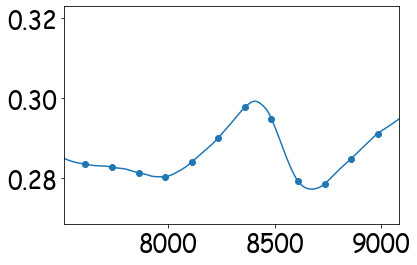

In [74]:
plt.plot(T, c3)
plt.scatter(X, Y)
plt.xlim(X[0]-100, X[-1]+100)